# 森林火灾模拟

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#随机生长" data-toc-modified-id="随机生长-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>随机生长</a></span><ul class="toc-item"><li><span><a href="#示例" data-toc-modified-id="示例-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>示例</a></span></li><li><span><a href="#关于np.random.uniform" data-toc-modified-id="关于np.random.uniform-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>关于np.random.uniform</a></span></li><li><span><a href="#np.prod()" data-toc-modified-id="np.prod()-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>np.prod()</a></span></li></ul></li><li><span><a href="#火灾模拟" data-toc-modified-id="火灾模拟-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>火灾模拟</a></span></li></ul></div>

## 随机生长
* 在原来的基础上,我们要先让树生长，即定义 `grow_trees()` 方法
    * 定义方法之前，我们要先指定两个属性：
    * 每个位置随机生长出树木的概率
* 每个位置随机被闪电击中的概率
* 为了方便，我们定义一个辅助函数来生成随机 bool 矩阵，大小与森林大小一致
* 按照给定的生长概率生成生长的位置，将` trees` 中相应位置设为` True`

### 示例

In [1]:
import numpy as np

class Forest(object):
    """ Forest can grow trees which eventually die."""
    # 初始化两个概率，可以修改的
    def __init__(self, size=(150,150), p_sapling=0.0025, p_lightning=5.0e-6):
        self.size = size
        self.trees = np.zeros(self.size, dtype=bool)
        self.fires = np.zeros((self.size), dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
        
    # print的时候返回的信息，类名和总数
    def __repr__(self):
        my_repr = "{}(size={})".format(self.__class__.__name__, self.size)
        return my_repr
    
    def __str__(self):
        return self.__class__.__name__
    
    # 这里定义的几个属性主要用来查看森林状态
    @property
    def num_cells(self):
        """Number of cells available for growing trees"""
        # 所有可能生长树的总数
        return np.prod(self.size)
    
    @property
    def tree_fraction(self):
        """
        Fraction of trees
        """
        # 树的比例
        num_trees = self.trees.sum()
        return float(num_trees) / self.num_cells
    
    @property
    def fire_fraction(self):
        """
        Fraction of fires
        """
        # 火灾比例
        num_fires = self.fires.sum()
        return float(num_fires) / self.num_cells
    
    # 真正起作用的函数
    def _rand_bool(self, p):
        """
        Random boolean distributed according to p, less than p will be True
        """
        # 生成随机数[0,1)的150x150d的随机矩阵与p_sapling=0.0025比较，小于就是Tur
        return np.random.uniform(size=self.trees.shape) < p
    
    def grow_trees(self):
        """
        Growing trees.
        """
        # 生长树的概率
        # 根据概率生成随机矩阵，将self.p_sapling传给p
        growth_sites = self._rand_bool(self.p_sapling)
        self.trees[growth_sites] = True

In [2]:
forest = Forest()
print forest.tree_fraction

forest.grow_trees()
print forest.tree_fraction

0.0
0.00235555555556


### 关于np.random.uniform

In [3]:
# 先看一下这几个数据，也就是说这个uniform生成150x150的随机矩阵，
# 元素为大小[0-1)，与p_sapling=0.0025比较返回bool值
print np.random.uniform(size=forest.trees.shape)
print forest.p_sapling
print np.random.uniform(size=forest.trees.shape)<forest.p_sapling

print forest._rand_bool(forest.p_sapling)
print forest.trees
# 这一句是关键，两个形状相同的bool数组，下面解释
print forest.trees[forest._rand_bool(forest.p_sapling)]

[[0.14420508 0.62909491 0.09199315 ... 0.87118448 0.63611352 0.70996704]
 [0.39705604 0.77763393 0.41926403 ... 0.44791658 0.77641785 0.94623144]
 [0.31213722 0.52919114 0.41956778 ... 0.02517946 0.2005947  0.60599473]
 ...
 [0.50963611 0.77371815 0.62312016 ... 0.30922114 0.24388471 0.6077615 ]
 [0.11977866 0.44563789 0.18601675 ... 0.76142173 0.08890528 0.99277197]
 [0.6268623  0.77984429 0.77413796 ... 0.14683815 0.46874849 0.22903343]]
0.0025
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False .

**`a`根据`b`中出现`True`对应的位置返回自身元素**

In [4]:
a = np.random.uniform(size=(3,4))<0.5
a

array([[False, False, False,  True],
       [ True,  True,  True, False],
       [False, False,  True,  True]])

In [5]:
b = np.random.uniform(size=(3,4))<0.5
b

array([[False, False, False,  True],
       [False, False,  True,  True],
       [False, False,  True,  True]])

In [6]:
a[b]

array([ True,  True, False,  True,  True])

**这里将`b`中出现`True`的位置，在`a`相对应的位置都设置为`True`**

In [7]:
a[b]=True
a

array([[False, False, False,  True],
       [ True,  True,  True,  True],
       [False, False,  True,  True]])

In [8]:
a.sum()

7

### np.prod()

In [9]:
np.prod((15,15))

225

In [10]:
np.prod([15,15])

225

**OK，搞清楚了这个数组机制，回头看一下火灾模拟**

## 火灾模拟

* 定义 `start_fires`()：
    * 按照给定的概率生成被闪电击中的位置
    * 如果闪电击中的位置有树，那么将其设为着火点
* 定义 `burn_trees`()：
    * 如果一棵树的上下左右有火，那么这棵树也会着火
* 定义 `advance_one_step()`：
    * 进行一次生长，起火，燃烧

In [11]:
import numpy as np

class Forest(object):
    def __init__(self, size=(150,150), p_sapling=0.0025, p_lightning=5.0e-6):
        # 生长树概率和被电击概率
        self.size = size
        self.trees = np.zeros(self.size,dtype=bool)
        self.fires = np.zeros(self.size,dtype=bool)
        self.p_sapling = p_sapling
        self.p_lightning = p_lightning
    
    # print的时候返回的信息，类名和总数
    def __repr__(self):
        my_repr = "{}(size={})".format(sedlf.__class__.__name__,self.size)
    
    def __str__(self):
        return self.__class__.__name__

    @property
    def num_cells(self):
        # 所有可能生长树的总数
        # np.prod方法计算元素乘积
        return np.prod(self.size)

    @property
    def tree_fraction(self):
        num_trees = self.trees.sum()
        return float(num_trees)/self.num_cells
    
    @property
    def tree_fraction(self):
        num_fires = self.fires.sum()
        return float(num_fires)/self.num_cells
    
    
    def _rand_bool(self,p):
        return np.random.uniform(size=self.trees.shape)<p
    
    def grow_trees(self):
        grow_sites = self._rand_bool(self.p_sapling)
        self.trees[grow_sites]=True
    
# 定义 start_fires()：
#     按照给定的概率生成被闪电击中的位置
#     如果闪电击中的位置有树，那么将其设为着火点
# 定义 burn_trees()：
#     如果一棵树的上下左右有火，那么这棵树也会着火
# 定义 advance_one_step()：
#     进行一次生长，起火，燃烧
    def start_fires(self):
        # 与grow_tree对应
        lightning_site = (self._rand_bool(self.p_lightning)&self.trees)
        self.fires[lightning_site]=True
        
    def burn_trees(self):
        # 边界处理
        fires = np.zeros((self.size[0] + 2, self.size[1] + 2), dtype=bool)
        fires[1:-1, 1:-1] = self.fires
        north = fires[:-2, 1:-1]
        south = fires[2:, 1:-1]
        east = fires[1:-1, :-2]
        west = fires[1:-1, 2:]
        new_fires = (north | south | east | west) & self.trees
        self.trees[self.fires] = False
        self.fires = new_fires
        
    def advance_one_step(self):
        self.grow_trees()
        self.start_fires()
        self.burn_trees()

In [12]:
forest = Forest()
# 100次迭代
for i in range(100):
    forest.advance_one_step()

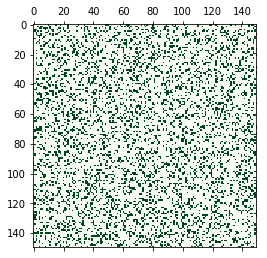

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.matshow(forest.trees,cmap=cm.Greens)
plt.show()

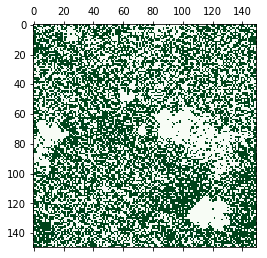

In [14]:
forest = Forest()
# 2500次迭代
for i in range(2500):
    forest.advance_one_step()
import matplotlib.pyplot as plt
from matplotlib import cm
plt.matshow(forest.trees,cmap=cm.Greens)
plt.show()

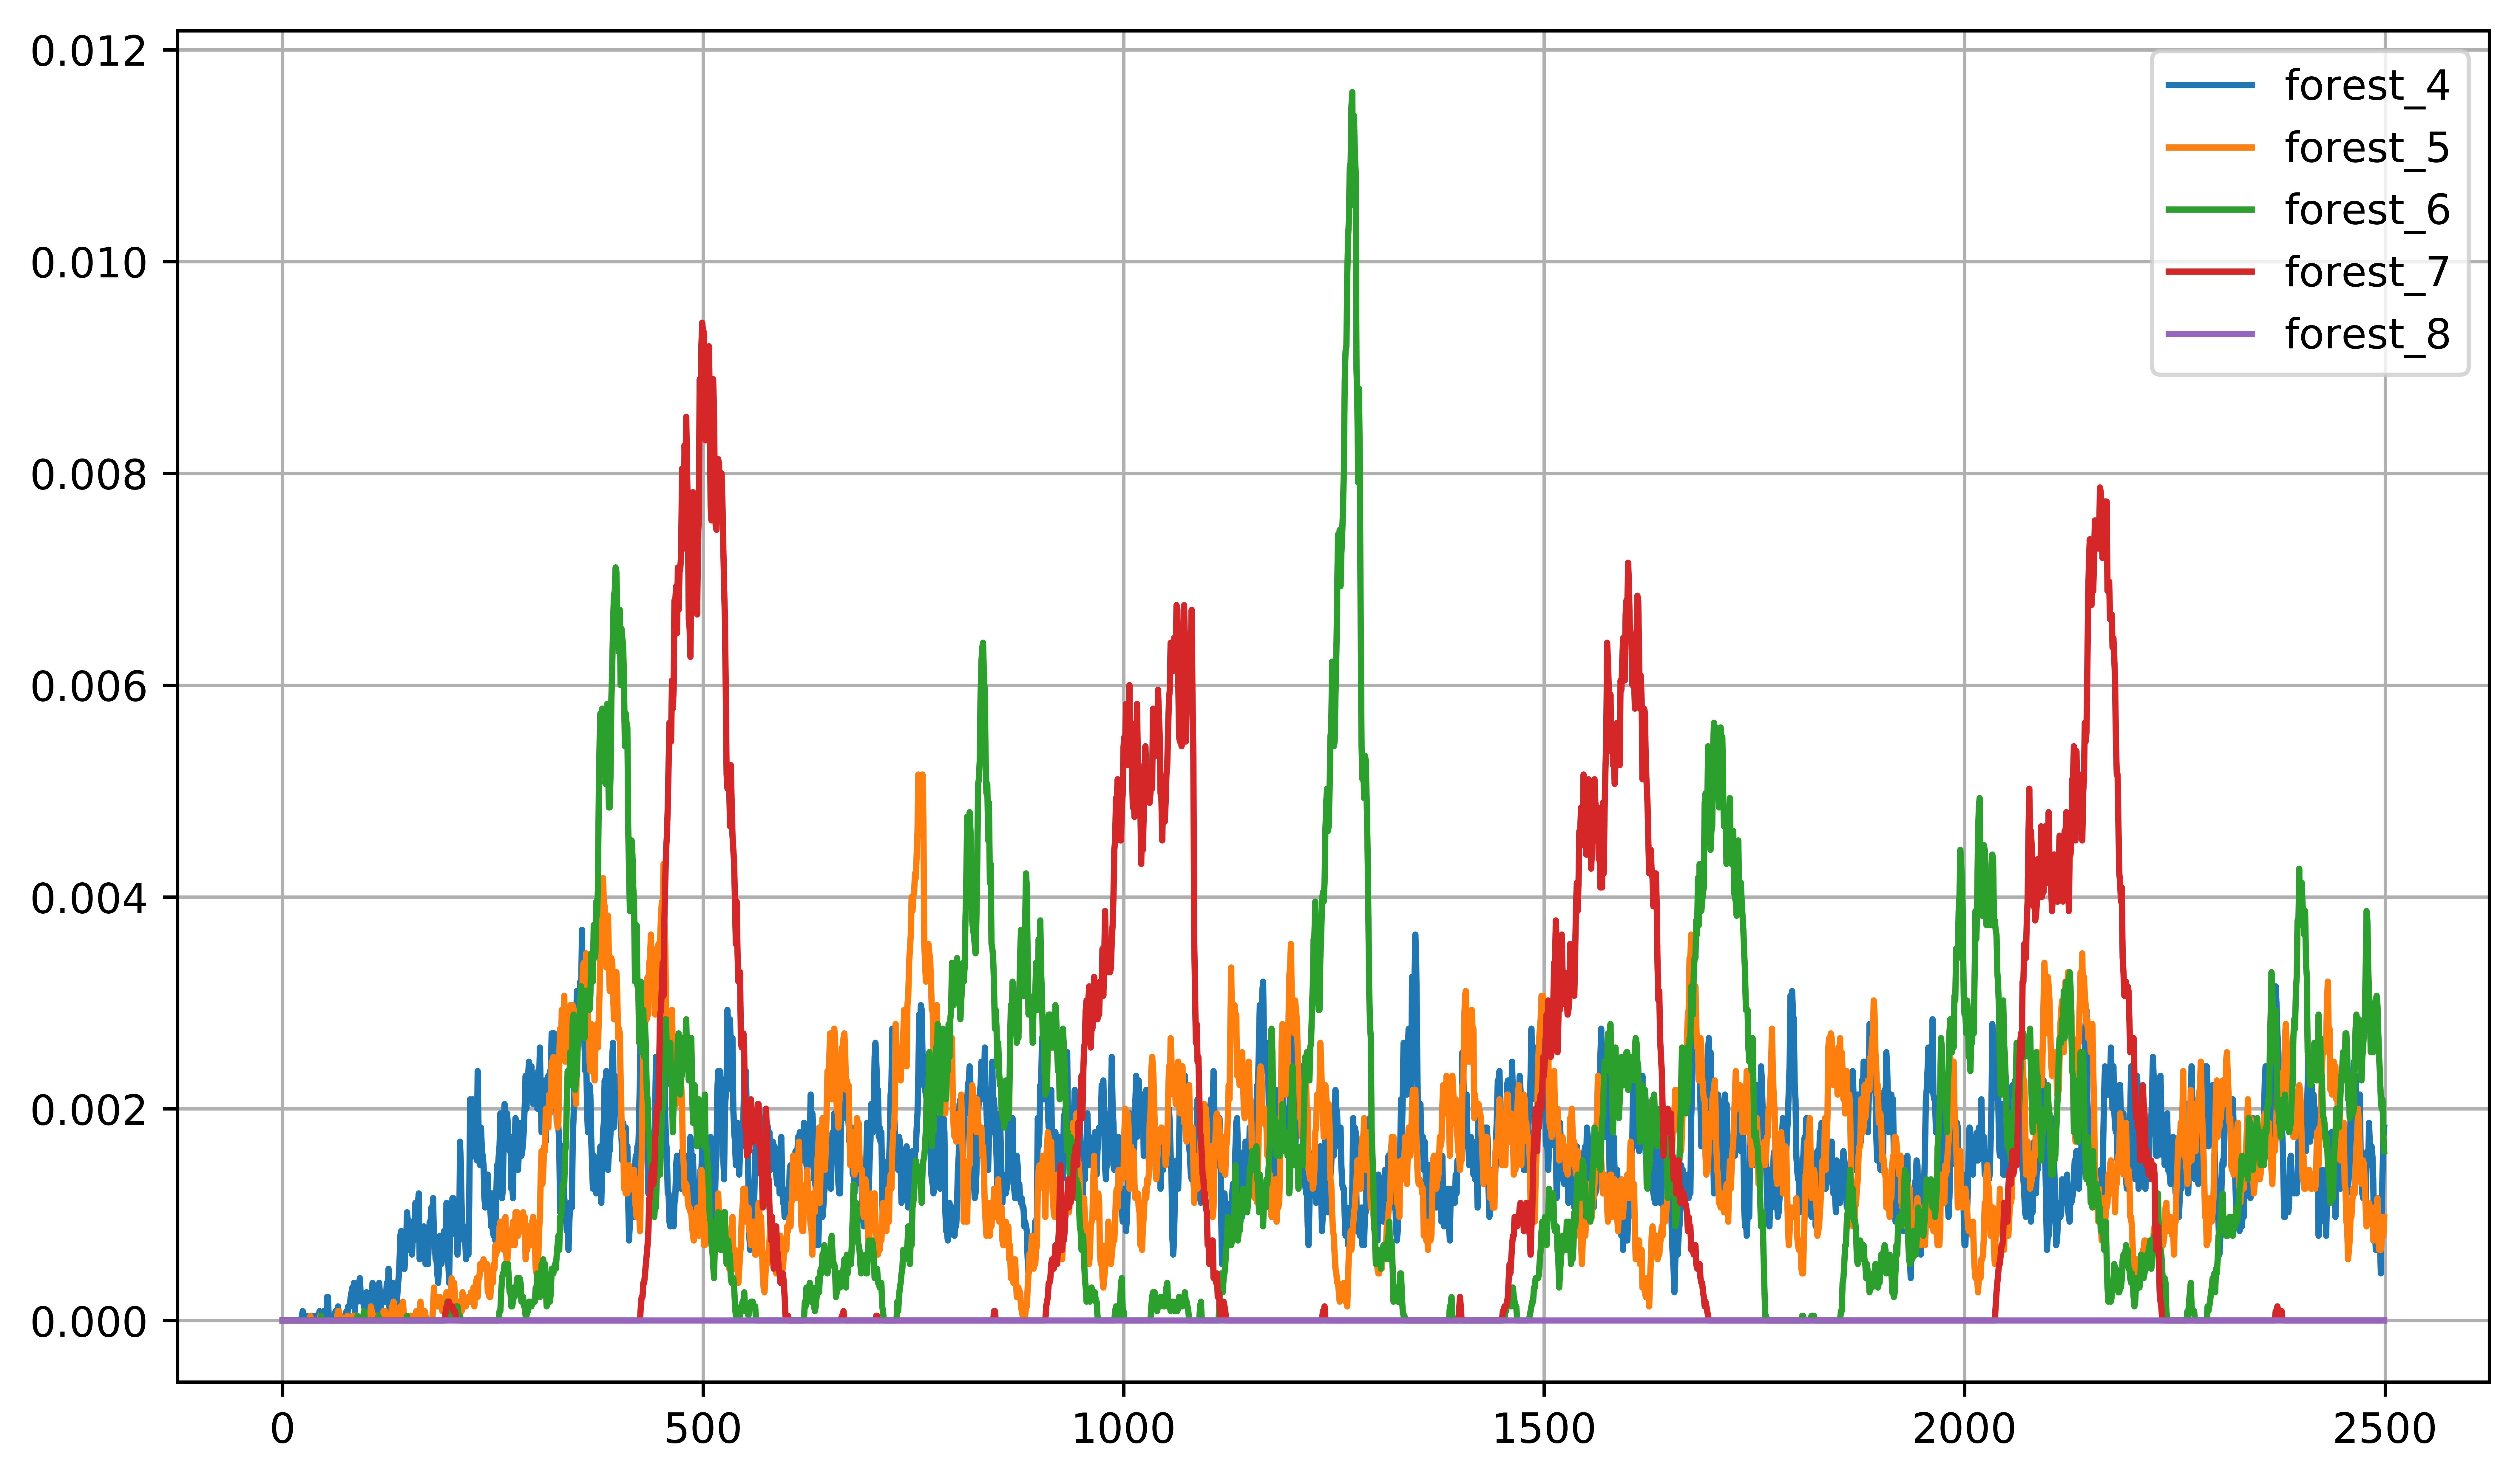

In [15]:
# 设置不同着火点森林覆盖率趋势
forest_8 = Forest(p_lightning=5.0e-8)
forest_7 = Forest(p_lightning=5.0e-7)
forest_6 = Forest(p_lightning=5.0e-6)
forest_5 = Forest(p_lightning=5.0e-5)
forest_4 = Forest(p_lightning=5.0e-4)
tree_fractions = []
for i in range(2500):
    forest_4.advance_one_step()
    forest_5.advance_one_step()
    forest_6.advance_one_step()
    forest_7.advance_one_step()
    forest_8.advance_one_step()
    
    tree_fractions.append((forest_4.tree_fraction, 
                           forest_5.tree_fraction,
                           forest_6.tree_fraction,
                           forest_7.tree_fraction,
                           forest_8.tree_fraction,
                          ))

# 设置图像大小
f = plt.figure(figsize=(10,6), dpi=1000)

plt.plot(tree_fractions)
plt.grid(True)   

# 加入图例
l = plt.legend(['forest_4', 'forest_5','forest_6','forest_7','forest_8'])

plt.show()